In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Load a file under "data" folder
file = "./data/sense.csv"
data = pd.read_csv(file, sep=",", encoding="euc-kr")

In [4]:
data['Sensor time'] = data['Sensor time'].astype(str)
data["Sensor time"]= data["Sensor time"].str[:12]
data['Sensor time'] = pd.to_datetime(data['Sensor time'], format="%Y%m%d%H%M")

In [5]:
data.drop('Time', axis = 1, inplace = True)
data.drop('Barn number', axis = 1, inplace = True)
data.drop('Module ID', axis = 1, inplace = True)

In [6]:
#Checking the null values in the data fields
data.isnull().sum(axis=0)

Type                    0
Vlaue                   0
Sensor time             0
dtype: int64

In [7]:
data[['Sensor time', 'Collecting device ID', 'Type', 'Vlaue']]

,Sensor time,Collecting device ID,Type,Vlaue
0,2021-06-30 23:58:00,GW01,humidity,99.899950
1,2021-06-30 23:58:00,GW01,temp,21.099990
2,2021-06-30 23:58:00,GW01,co2,402.890000
3,2021-06-30 23:58:00,GW01,nh3,4.380000
4,2021-06-30 23:56:00,GW01,humidity,99.899940
...,...,...,...,...
38919,2021-06-10 12:27:00,GW01,humidity,45.639000
38920,2021-06-10 12:23:00,GW01,nh3,11.934230
38921,2021-06-10 12:23:00,GW01,co2,409.215100
38922,2021-06-10 12:16:00,GW01,co2,402.246300


In [8]:
pivoted = data.pivot(['Sensor time','Collecting device ID'], 'Type', 'Vlaue')
#pivoted = data.pivot('Sensor time', 'Type', 'Vlaue')
pivoted = pivoted.reset_index()

In [9]:
pivoted_sorted = pivoted.sort_values(by='Sensor time' ,ascending=True)

In [10]:
filtered_df=pivoted_sorted.loc['2021-06-01':]
filtered_df

Type,Sensor time,Collecting device ID,co2,humidity,nh3,temp
2022,2021-06-16 18:55:00,GW01,NaN,44.72834,NaN,28.93501
2023,2021-06-16 18:57:00,GW01,NaN,44.51500,NaN,28.91834
2024,2021-06-16 18:59:00,GW01,NaN,44.85167,NaN,28.92335
2025,2021-06-16 19:01:00,GW01,NaN,45.24334,NaN,28.89168
2026,2021-06-16 19:03:00,GW01,NaN,45.31334,NaN,28.90001
...,...,...,...,...,...,...
13001,2021-06-30 23:50:00,GW01,402.92,99.89994,4.42,21.10499
13002,2021-06-30 23:52:00,GW01,402.91,99.89994,4.41,21.11694
13003,2021-06-30 23:54:00,GW01,402.92,99.89994,4.42,21.10168
13004,2021-06-30 23:56:00,GW01,402.89,99.89994,4.39,21.10338


In [91]:
grouped_df = filtered_df.groupby(pd.Grouper(key='Sensor time' ,freq='1h'))[['Collecting device ID','co2','humidity','nh3','temp']]. \
agg({'Collecting device ID' : 'max','co2' : ['mean','median','std'],'humidity' : ['mean','median','std'],
     'nh3' : ['mean','median','std'],'temp' : ['mean','median','std']})

grouped_df_mean = filtered_df.groupby(pd.Grouper(key='Sensor time' ,freq='1h'))[['Collecting device ID','co2','humidity','nh3','temp']]. \
agg({'Collecting device ID' : 'max','co2' : ['mean'],'humidity' : ['mean'],
     'nh3' : ['mean'],'temp' : ['mean']})

grouped_df_mean = filtered_df.groupby(pd.Grouper(key='Sensor time' ,freq='1h')).mean()

In [92]:
grouped_df_mean

Type,co2,humidity,nh3,temp
Sensor time,,,,
2021-06-16 18:00:00,NaN,44.698337,NaN,28.925567
2021-06-16 19:00:00,402.534100,46.829899,3.912415,29.011436
2021-06-16 20:00:00,NaN,49.594287,NaN,28.477125
2021-06-16 21:00:00,NaN,50.261222,NaN,27.980958
2021-06-16 22:00:00,NaN,52.667649,NaN,27.562711
...,...,...,...,...
2021-06-30 19:00:00,402.696667,99.781939,4.131667,24.828546
2021-06-30 20:00:00,402.187333,99.899941,3.445667,23.243017
2021-06-30 21:00:00,402.005333,99.899941,3.198000,22.113639


## 시계열 - Line Chart

### X 범주형/수치형

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


%matplotlib inline 

Text(0, 0.5, 'Value')

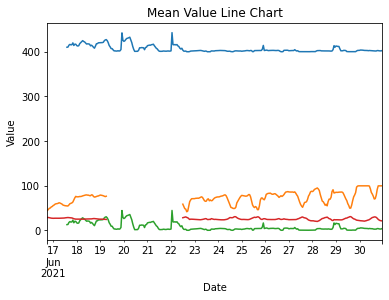

In [77]:
ax_line = grouped_df['co2']['mean'].plot.line()
ax_line = grouped_df['humidity']['mean'].plot.line()
ax_line = grouped_df['nh3']['mean'].plot.line()
ax_line = grouped_df['temp']['mean'].plot.line()

ax_line.set_title('Mean Value Line Chart')
ax_line.set_xlabel("Date")
ax_line.set_ylabel("Value")

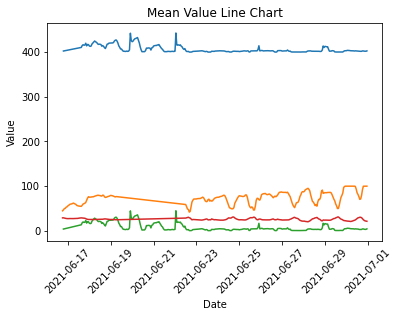

In [78]:
ax_line = sns.lineplot(data=grouped_df['co2']['mean'])
ax_line = sns.lineplot(data=grouped_df['humidity']['mean'])
ax_line = sns.lineplot(data=grouped_df['nh3']['mean'])
ax_line = sns.lineplot(data=grouped_df['temp']['mean'])

ax_line.set_title('Mean Value Line Chart')
ax_line.set_xlabel('Date')
ax_line.set_ylabel('Value')

ax_line.tick_params(axis='x', labelrotation=45)

## 시계열 - Area Chart

Text(0, 0.5, 'Value')

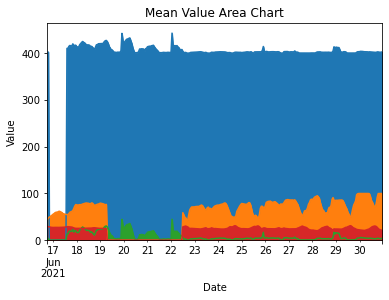

In [79]:
ax_line = grouped_df['co2']['mean'].plot.area()
ax_line = grouped_df['humidity']['mean'].plot.area()
ax_line = grouped_df['nh3']['mean'].plot.area()
ax_line = grouped_df['temp']['mean'].plot.area()

ax_line.set_title('Mean Value Area Chart')
ax_line.set_xlabel("Date")
ax_line.set_ylabel("Value")

## 시계열 - Histogram Chart

<AxesSubplot:xlabel='co2', ylabel='Count'>

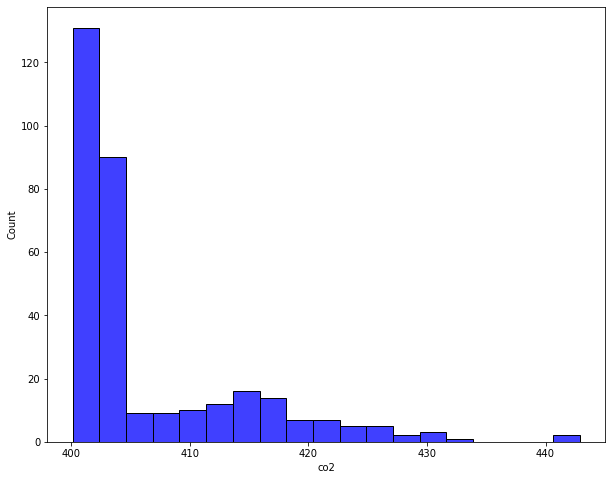

In [80]:
plt.figure(figsize=(10,8))
sns.histplot(data=grouped_df_mean, x= "co2", color = "blue")

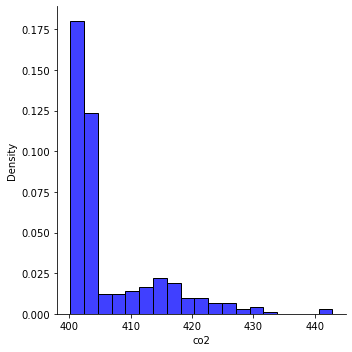

In [81]:
sns.displot(grouped_df_mean, x= "co2", color = "blue", stat="density")

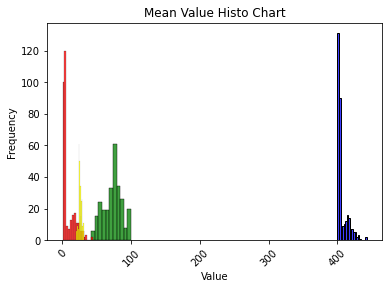

In [82]:
ax_line = sns.histplot(data=grouped_df['co2']['mean'], color='blue')
ax_line = sns.histplot(data=grouped_df['humidity']['mean'], color='green')
ax_line = sns.histplot(data=grouped_df['nh3']['mean'], color='red')
ax_line = sns.histplot(data=grouped_df['temp']['mean'], color='yellow')

ax_line.set_title('Mean Value Histo Chart')
ax_line.set_xlabel('Value')
ax_line.set_ylabel('Frequency')

ax_line.tick_params(axis='x', labelrotation=45)

### 연관성 -  Scatter Chart

<AxesSubplot:title={'center':'nh3 ----- temp'}, xlabel='nh3', ylabel='temp'>

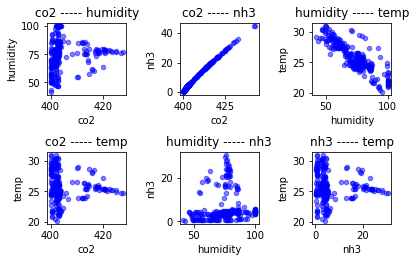

In [83]:
fig, ax = plt.subplots(2, 3)

grouped_df_mean.plot(x='co2' ,y='humidity', color = 'blue', kind = "scatter" ,alpha=0.5, title ='co2 ----- humidity', ax=ax[0, 0])
plt.tight_layout(pad=2, h_pad=1)
grouped_df_mean.plot(x='co2' ,y='nh3', color = 'blue', kind = "scatter" ,alpha=0.5, title ='co2 ----- nh3', ax=ax[0, 1])
plt.tight_layout(pad=2, h_pad=1)
grouped_df_mean.plot(x='co2' ,y='temp', color = 'blue', kind = "scatter" ,alpha=0.5, title ='co2 ----- temp', ax=ax[1, 0])
plt.tight_layout(pad=2, h_pad=1)

grouped_df_mean.plot(x='humidity' ,y='nh3', color = 'blue', kind = "scatter" ,alpha=0.5, title ='humidity ----- nh3', ax=ax[1, 1])
plt.tight_layout(pad=2, h_pad=1)
grouped_df_mean.plot(x='humidity' ,y='temp', color = 'blue', kind = "scatter" ,alpha=0.5, title ='humidity ----- temp', ax=ax[0, 2])
plt.tight_layout(pad=2, h_pad=1)
grouped_df_mean.plot(x='nh3' ,y='temp', color = 'blue', kind = "scatter" ,alpha=0.5, title ='nh3 ----- temp', ax=ax[1, 2])

## 연관성 - Bubble Chart

<AxesSubplot:xlabel='co2', ylabel='temp'>

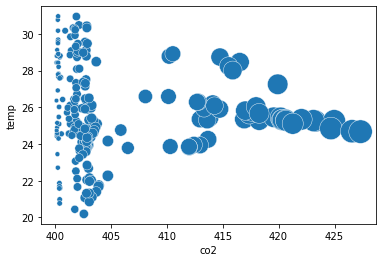

In [84]:
fig, ax = plt.subplots()
sns.scatterplot(data=grouped_df_mean, x="co2", y="temp", size="nh3", legend=False, sizes=(20, 800))

<AxesSubplot:xlabel='humidity', ylabel='temp'>

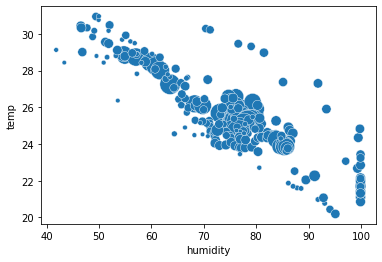

In [85]:
sns.scatterplot(data=grouped_df_mean, x="humidity", y="temp", size="nh3", legend=False, sizes=(20, 800))

## 비교, 순위 - Heat Map

In [95]:
ax = sns.heatmap(grouped_df_mean)
plt.show() 

## 분포 - Box Plot

<AxesSubplot:ylabel='temp'>

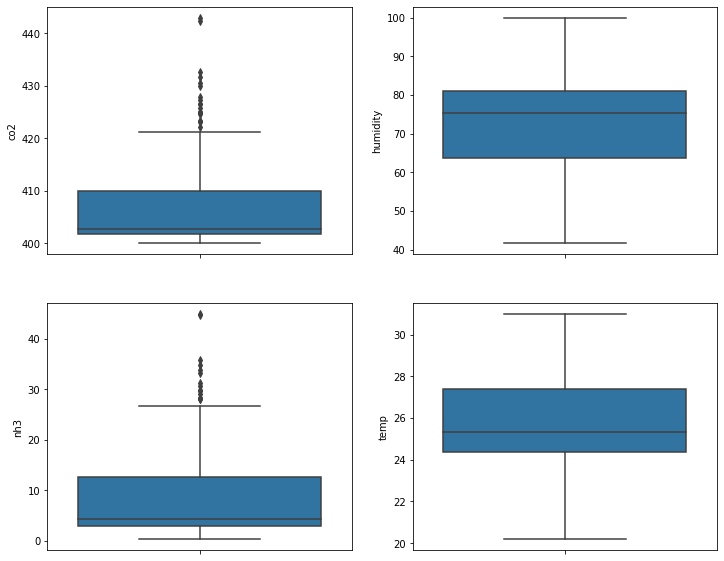

In [100]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)

sns.boxplot(y=grouped_df_mean['co2'],ax=axes[0][0])
sns.boxplot(y=grouped_df_mean['humidity'],ax=axes[0][1])
sns.boxplot(y=grouped_df_mean['nh3'],ax=axes[1][0])
sns.boxplot(y=grouped_df_mean['temp'],ax=axes[1][1])


## Violin Plot

<AxesSubplot:ylabel='temp'>

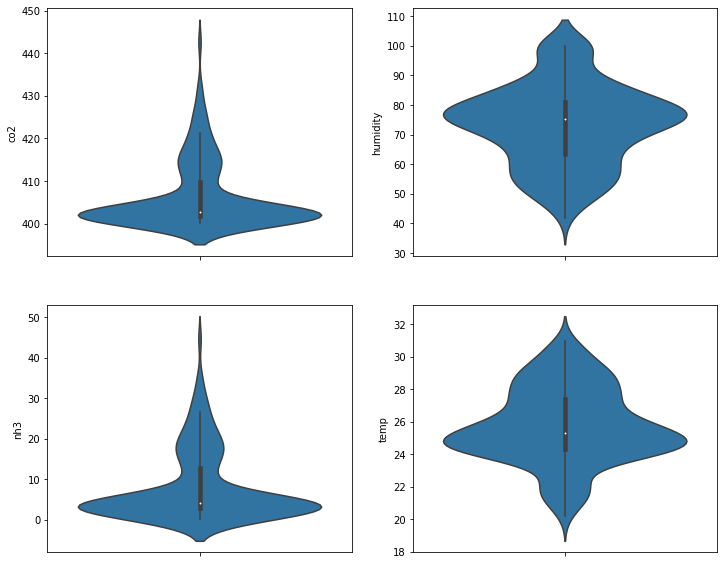

In [105]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)

sns.violinplot(y=grouped_df_mean['co2'],ax=axes[0][0])
sns.violinplot(y=grouped_df_mean['humidity'],ax=axes[0][1])
sns.violinplot(y=grouped_df_mean['nh3'],ax=axes[1][0])
sns.violinplot(y=grouped_df_mean['temp'],ax=axes[1][1])